## Setup

In [1]:
%run setup.ipynb
%matplotlib inline
import hapclust

In [2]:
# load data
callset_haps = np.load('../data/haps_phase1.npz')
haps = allel.HaplotypeArray(callset_haps['haplotypes'])
pos = allel.SortedIndex(callset_haps['POS'])
ann = callset_haps['ANN']

In [3]:
# chop into gene
loc_vgsc = pos.locate_range(region_vgsc.start, region_vgsc.end)
h_vgsc = haps[loc_vgsc]
pos_vgsc = pos[loc_vgsc]

h_vgsc

<HaplotypeArray shape=(1713, 1530) dtype=int8>
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
...
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0

In [4]:
tbl_haplotypes = etl.fromtsv('../data/ag1000g.phase1.AR3.1.haplotypes.meta.txt')
hap_pops = np.array(tbl_haplotypes.values('population'))[ :-16]
# need to use named colors for graphviz
pop_colors = {
    'AOM': 'brown',
    'BFM': 'firebrick1',
    'GWA': 'goldenrod1',
    'GNS': 'cadetblue1',
    'BFS': 'deepskyblue',
    'CMS': 'dodgerblue3',
    'UGS': 'palegreen',
    'GAS': 'olivedrab',
    'KES': 'grey47',
    'colony': 'black'
}
hap_colors = np.array([pop_colors[p] for p in hap_pops])

In [5]:
tbl_variant_labels = (
    etl
    .frompickle('../data/tbl_variants_phase1.pkl')
    .eq('num_alleles', 2)
    .cut('POS', 'AGAP004707-RA')
    .convert('AGAP004707-RA', lambda v: v[1] if v[0] == 'NON_SYNONYMOUS_CODING' else '')
    .rename('AGAP004707-RA', 'label')
)
tbl_variant_labels

0|POS,1|label
2358254,D33N
2358316,
2358328,
2358353,
2358405,


In [6]:
len(tbl_variant_labels)

6348

In [7]:
pos2label = tbl_variant_labels.lookupone('POS', 'label')

In [8]:
pos2label[2358254], len(pos_vgsc)

('D33N', 1713)

In [9]:
variant_labels = np.array([pos2label.get(p, '') for p in pos_vgsc], dtype=object)
# variant_labels_vgsc = variant_labels[loc]
# variant_labels_vgsc[:5]
variant_labels[:5]

array(['D33N', '', '', '', ''], dtype=object)

In [10]:
pos_vgsc

0,1,2,3,4,...,1708,1709,1710,1711,1712
2358254,2358316,2358328,2358353,2358405,...,2431417,2431487,2431518,2431527,2431542


## Plot networks

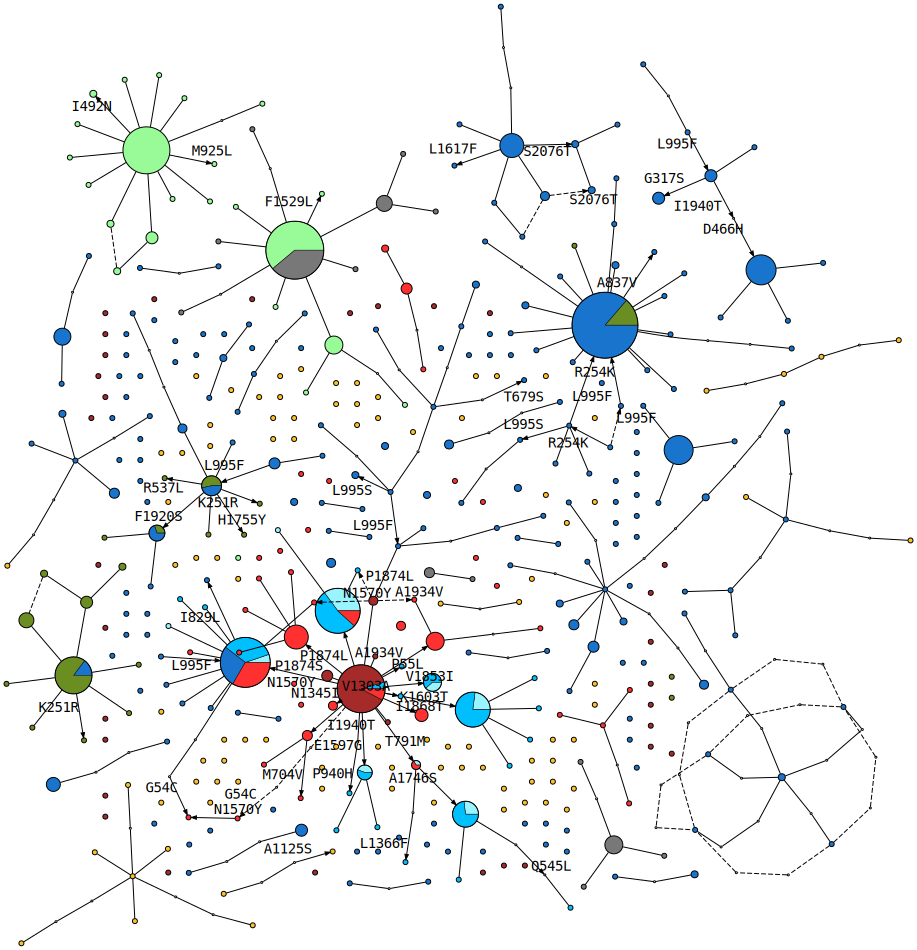

In [11]:
graph, _ = hapclust.graph_haplotype_network(
    h_vgsc, 
    network_method='msn', 
    hap_colors=hap_colors, 
    max_dist= 3, 
    variant_labels=variant_labels)
graph

In [13]:
pos_995S = 2422651
pos_995F = 2422652
pos_1527 = 2429617

In [14]:
loc_995S = h_vgsc[pos_vgsc.locate_key(pos_995S)] == 1
loc_995F = h_vgsc[pos_vgsc.locate_key(pos_995F)] == 1
loc_1527 = h_vgsc[pos_vgsc.locate_key(pos_1527)] == 1

In [15]:
np.count_nonzero(loc_995F), np.count_nonzero(loc_995S), np.count_nonzero(loc_1527)

(775, 430, 19)

In [16]:
#kdr haps
h_vgsc_995F = h_vgsc.compress(loc_995F, axis=1)
h_vgsc_995S = h_vgsc.compress(loc_995S, axis=1)
h_vgsc_1527 = h_vgsc.compress(loc_1527, axis=1)

In [17]:
#colours
hap_colors_995F = hap_colors.compress(loc_995F)
hap_colors_995S = hap_colors.compress(loc_995S)
hap_colors_1527 = hap_colors.compress(loc_1527)

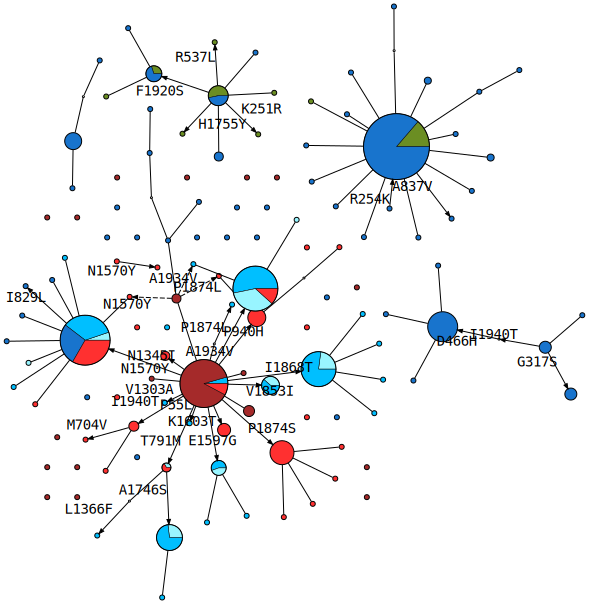

In [18]:
graph, hapcount = hapclust.graph_haplotype_network(h_vgsc_995F, network_method='mjn', max_dist=2, hap_colors=hap_colors_995F, variant_labels=variant_labels)

graph.format = 'svg'
fn = '../artwork/995F_clusters_mjn_maxdist2'
graph.render(fn)

graph

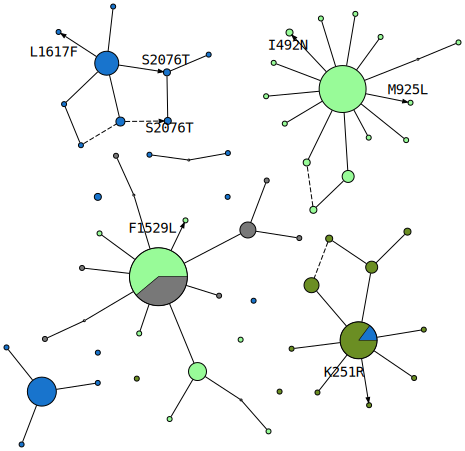

In [19]:
graph, hapcount = hapclust.graph_haplotype_network(h_vgsc_995S, network_method='mjn', max_dist=2, hap_colors=hap_colors_995S, variant_labels=variant_labels)

graph.format = 'svg'
fn = '../artwork/995S_clusters_mjn_maxdist2'
graph.render(fn)

graph

In [20]:
graph, hapcount = hapclust.graph_haplotype_network(h_vgsc_1527, network_method='mjn', max_dist=2, hap_colors=hap_colors_1527, variant_labels=variant_labels)

graph.format = 'svg'
fn = '../artwork/1527_clusters_mjn_maxdist2'
graph.render(fn)

graph

KeyboardInterrupt: 

In [19]:
hapcount[37]

54